STEP 1 — Import Libraries & Load Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Load dataset
df = pd.read_csv("dataset.csv")

df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,22-01-2020,Afghanistan,0,0,0
1,23-01-2020,Afghanistan,0,0,0
2,24-01-2020,Afghanistan,0,0,0
3,25-01-2020,Afghanistan,0,0,0
4,26-01-2020,Afghanistan,0,0,0


STEP 2 — Basic Information

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB
None
          Confirmed     Recovered         Deaths
count  1.615680e+05  1.615680e+05  161568.000000
mean   7.361569e+05  1.453967e+05   13999.436089
std    3.578884e+06  9.748275e+05   59113.581271
min    0.000000e+00  0.000000e+00       0.000000
25%    1.220000e+03  0.000000e+00      17.000000
50%    2.369200e+04  1.260000e+02     365.000000
75%    2.558420e+05  1.797225e+04    4509.000000
max    8.062512e+07  3.097475e+07  988609.000000
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


STEP 3 — Convert Date Column

In [6]:
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\IPL4\AppData\Local\Temp\ipykernel_15528\3386729631.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


STEP 4 — Global Trends
Global Confirmed Cases Over Time

Date
2020-01-22     557
2020-01-23     657
2020-01-24     944
2020-01-25    1437
2020-01-26    2120
Name: Confirmed, dtype: int64


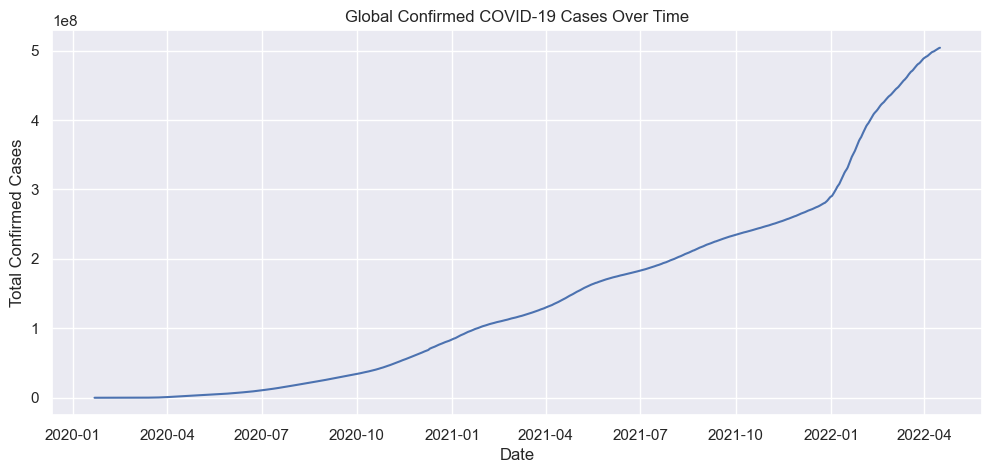

In [7]:
global_cases = df.groupby("Date")["Confirmed"].sum()
print(global_cases.head())

plt.figure(figsize=(12,5))
plt.plot(global_cases)
plt.title("Global Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.show()


Global Deaths Over Time

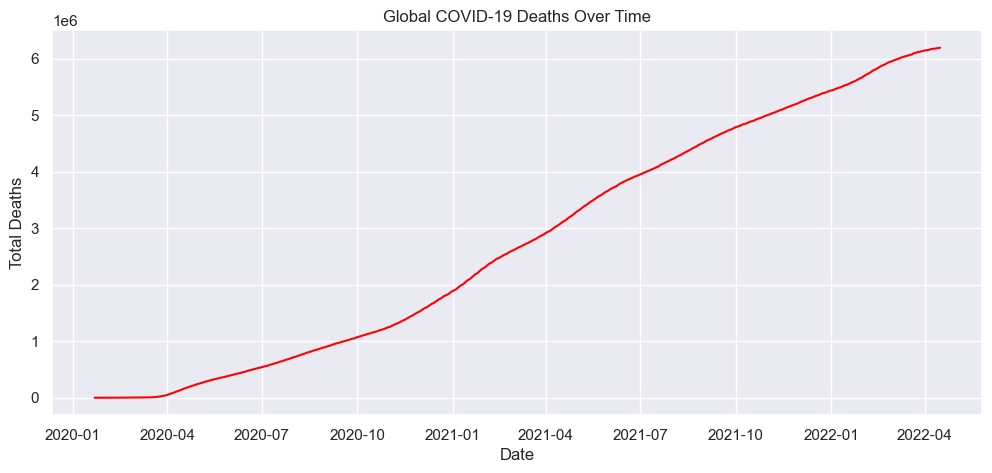

In [8]:
global_deaths = df.groupby("Date")["Deaths"].sum()

plt.figure(figsize=(12,5))
plt.plot(global_deaths, color='red')
plt.title("Global COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.show()


STEP 5 — Top 10 Countries (Latest Date)

           Date      Country  Confirmed  Recovered  Deaths
815  2022-04-16  Afghanistan     178387          0    7676
1631 2022-04-16      Albania     274462          0    3496
2447 2022-04-16      Algeria     265739          0    6874
3263 2022-04-16      Andorra      40709          0     153
4079 2022-04-16       Angola      99194          0    1900
2022-04-16 00:00:00
             Date         Country  Confirmed  Recovered  Deaths
150143 2022-04-16              US   80625120          0  988609
66095  2022-04-16           India   43042097          0  521751
20399  2022-04-16          Brazil   30250077          0  662185
52223  2022-04-16          France   27874269          0  145159
55487  2022-04-16         Germany   23416663          0  132942
153407 2022-04-16  United Kingdom   21916961          0  172014
119135 2022-04-16          Russia   17801103          0  365774
76703  2022-04-16    Korea, South   16305752          0   21092
70991  2022-04-16           Italy   15659835      

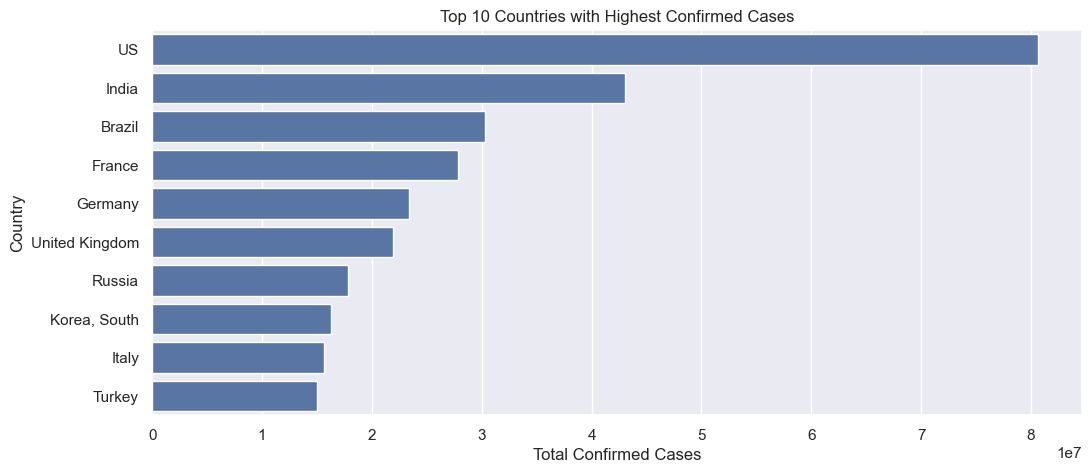

In [9]:
latest_date = df["Date"].max()
latest = df[df["Date"] == latest_date]
print(latest.head())
print(latest_date)

# Top 10 Confirmed Cases
top10_cases = latest.nlargest(10, "Confirmed")
print(top10_cases)
plt.figure(figsize=(12,5))
sns.barplot(y=top10_cases["Country"], x=top10_cases["Confirmed"])
plt.title("Top 10 Countries with Highest Confirmed Cases")
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.show()


STEP 6 — Top 10 Countries with Highest Deaths

             Date         Country  Confirmed  Recovered  Deaths
150143 2022-04-16              US   80625120          0  988609
20399  2022-04-16          Brazil   30250077          0  662185
66095  2022-04-16           India   43042097          0  521751
119135 2022-04-16          Russia   17801103          0  365774
95471  2022-04-16          Mexico    5726668          0  323938
114239 2022-04-16            Peru    3555139          0  212619
153407 2022-04-16  United Kingdom   21916961          0  172014
70991  2022-04-16           Italy   15659835          0  161602
66911  2022-04-16       Indonesia    6039266          0  155844
52223  2022-04-16          France   27874269          0  145159


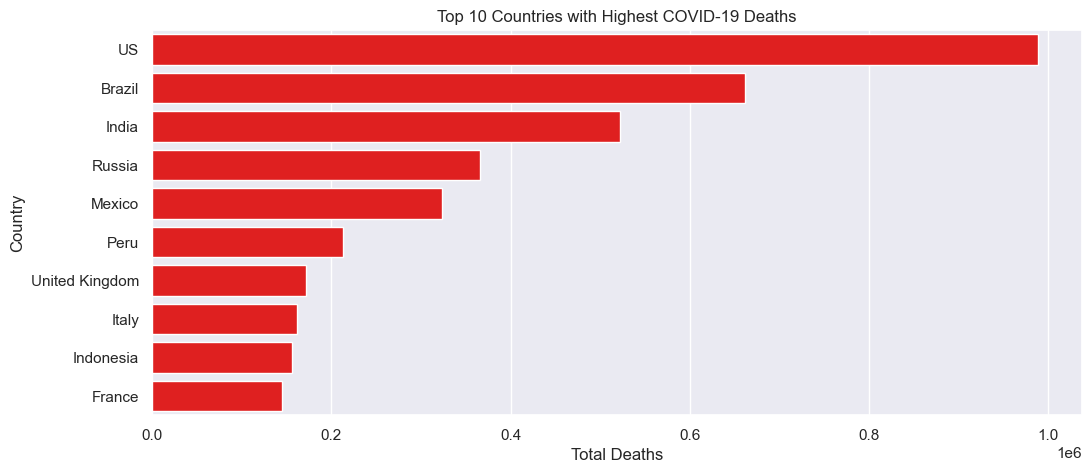

In [10]:
top10_deaths = latest.nlargest(10, "Deaths")
print(top10_deaths)

plt.figure(figsize=(12,5))
sns.barplot(y=top10_deaths["Country"], x=top10_deaths["Deaths"], color="red")
plt.title("Top 10 Countries with Highest COVID-19 Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.show()


STEP 7 — Country-wise Case Trend

            Date Country  Confirmed  Recovered  Deaths
65280 2020-01-22   India          0          0       0
65281 2020-01-23   India          0          0       0
65282 2020-01-24   India          0          0       0
65283 2020-01-25   India          0          0       0
65284 2020-01-26   India          0          0       0


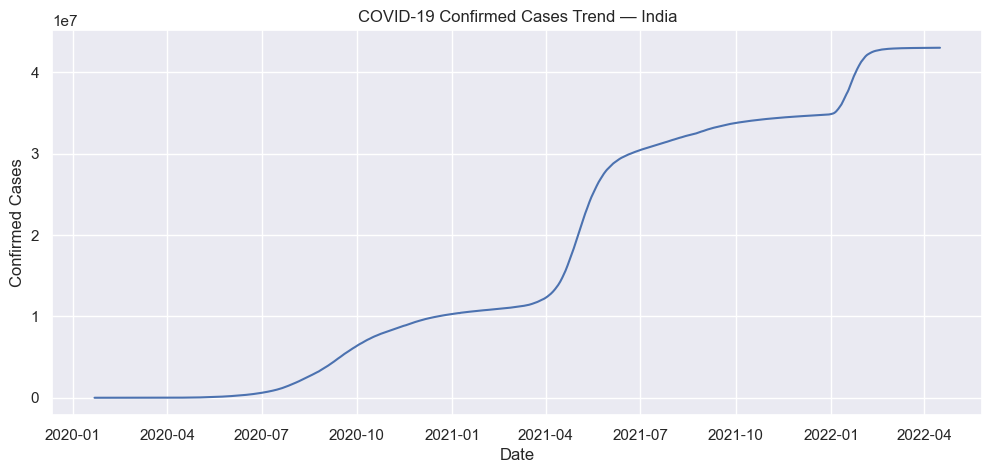

In [12]:
country = "India"
india_df = df[df["Country"] == country]
print(india_df.head())

plt.figure(figsize=(12,5))
plt.plot(india_df["Date"], india_df["Confirmed"])
plt.title(f"COVID-19 Confirmed Cases Trend — {country}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()


             Date Country  Confirmed  Recovered  Deaths
149328 2020-01-22      US          1          0       0
149329 2020-01-23      US          1          0       0
149330 2020-01-24      US          2          0       0
149331 2020-01-25      US          2          0       0
149332 2020-01-26      US          5          0       0


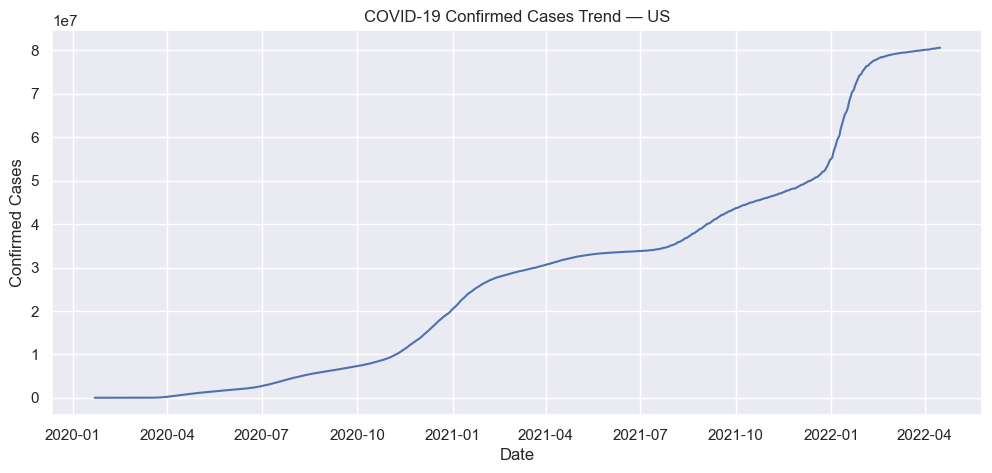

In [13]:
country = "US"
india_df = df[df["Country"] == country]
print(india_df.head())

plt.figure(figsize=(12,5))
plt.plot(india_df["Date"], india_df["Confirmed"])
plt.title(f"COVID-19 Confirmed Cases Trend — {country}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()


STEP 8 — Active Cases Calculation

In [16]:
df["Active"] = df["Confirmed"] - df["Recovered"] - df["Deaths"]
print(df["Active"].tail())


161563    241634
161564    241700
161565    241746
161566    241775
161567    241775
Name: Active, dtype: int64


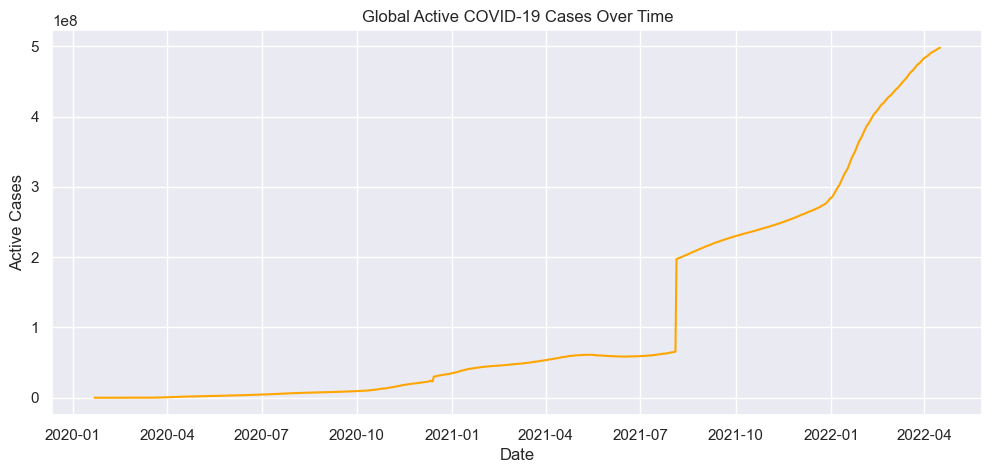

In [17]:
#Plot active cases globally:
global_active = df.groupby("Date")["Active"].sum()

plt.figure(figsize=(12,5))
plt.plot(global_active, color="orange")
plt.title("Global Active COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.show()


INSIGHTS for Your Project Report

1. Daily global confirmed and death cases increased rapidly during 2020–2021.
2. Countries like the USA, India, Brazil, and Russia reported the highest cases.
3. Death trends follow a similar pattern to confirmed cases.
4. Active cases peaked during the second wave globally.
5. Some countries showed faster recovery rates than others.

This EDA provides a clear picture of COVID-19 spread across the globe.
The dataset reveals major trends in confirmed cases, deaths, and recoveries for each country.
Data visualization helps identify top affected countries and understand the overall timeline of the pandemic.
This project demonstrates skills in Pandas, Matplotlib, and Seaborn for real-world data analysis.